In [1]:
# Load required package.
# Packages for data preprocessing and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import datetime as dt
import dataframe_image as dfi
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings to improve readibility.
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Load Data
df = pd.read_csv("loans_full_schema.csv")

In [3]:
# Look at the head of the data
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [71]:
# Check the data type and data status in each columns
data_type = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), df.describe(include = "all")\
           .T[['min', 'max']]], axis = 1).reset_index()\
            .rename(columns = {"index": "field",
                               0: "num_of_unique_value",
                               1: "data_type",
                               2: "count_of_null",
                               3: "min",
                               4: "max"})
data_type

,field,num_of_unique_value,data_type,count_of_null,min,max
0,annual_income,1461,float64,0,3000.0,2300000.00
1,debt_to_income,3673,float64,0,0.0,469.09
2,delinq_2y,12,int64,0,0.0,13.00
3,earliest_credit_line,53,int64,0,1963.0,2015.00
4,inquiries_last_12m,26,int64,0,0.0,29.00
...,...,...,...,...,...,...
154,loan_status_Late (31-120 days),2,uint8,0,0.0,1.00
155,initial_listing_status_fractional,2,uint8,0,0.0,1.00
156,initial_listing_status_whole,2,uint8,0,0.0,1.00
157,disbursement_method_Cash,2,uint8,0,0.0,1.00


In [6]:
# Data Structure
print(f'Number of records: {df.shape[0]}')
print(f'Number of fields in each record: {df.shape[1]}')

Number of records: 10000
Number of fields in each record: 55


In [7]:
# The function for checking missing value in each column
def missing_value_checker(df):
    variable_proportion = [
            [variable, round((df[variable].isna().sum() / df.shape[0])*100, 4)] 
            for variable in df.columns 
            if df[variable].isna().sum() >= 0
        ]

    print('%-30s' % 'Variable with missing values', 'Percentage of missing values')
    for variable, proportion in sorted(variable_proportion, key=lambda x : x[1]):
        print('%-30s' % variable, proportion)
    
    variable_proportion = pd.DataFrame(variable_proportion, columns = ['Variable', 'missing%'])
        
    return variable_proportion

In [8]:
variable_proportion = missing_value_checker(df)

Variable with missing values   Percentage of missing values
state                          0.0
homeownership                  0.0
annual_income                  0.0
verified_income                0.0
delinq_2y                      0.0
earliest_credit_line           0.0
inquiries_last_12m             0.0
total_credit_lines             0.0
open_credit_lines              0.0
total_credit_limit             0.0
total_credit_utilized          0.0
num_collections_last_12m       0.0
num_historical_failed_to_pay   0.0
current_accounts_delinq        0.0
total_collection_amount_ever   0.0
current_installment_accounts   0.0
accounts_opened_24m            0.0
num_satisfactory_accounts      0.0
num_accounts_30d_past_due      0.0
num_active_debit_accounts      0.0
total_debit_limit              0.0
num_total_cc_accounts          0.0
num_open_cc_accounts           0.0
num_cc_carrying_balance        0.0
num_mort_accounts              0.0
account_never_delinq_percent   0.0
tax_liens                     

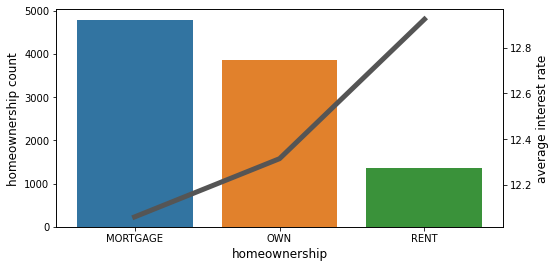

In [9]:
# Plot the homeowenership vs avg interest rate

fig, ax1 = plt.subplots(figsize= (8, 4))
ax2 = ax1.twinx()

sns.countplot(data=df, x='homeownership', ax=ax1)
pvt = pd.pivot_table(df, values='interest_rate', index='homeownership', aggfunc='mean').reset_index()
sns.lineplot(data=pvt, x='homeownership', y='interest_rate', ax=ax2, color='#555555', lineWidth=5, markers=10)

ax1.grid(False)
ax2.grid(False)
ax1.set_xlabel('homeownership', size=12)
ax1.set_ylabel('homeownership count', size=12)
ax2.set_ylabel('average interest rate', size=12)

fig.show()

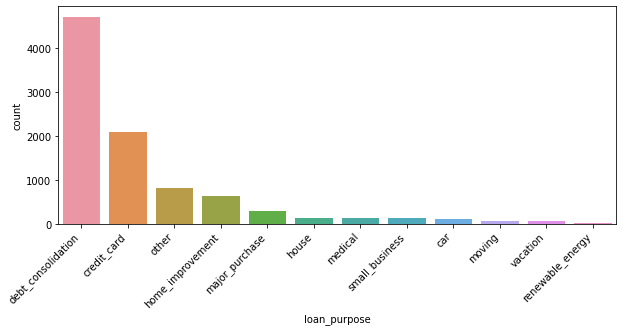

In [10]:
# Plot the count of the employee title

plt.figure(figsize=(10, 4))

loan_purpose_cnt = pd.pivot_table(df, values='emp_title', index='loan_purpose', aggfunc='count').reset_index().\
    rename(columns={'emp_title': 'count'}).sort_values(by='count', ascending=False)
sns.barplot(data=loan_purpose_cnt, x='loan_purpose', y='count')
plt.xticks(rotation=45, ha='right')
plt.show()

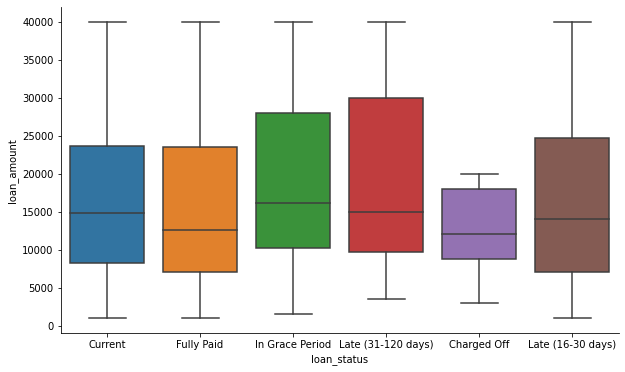

In [11]:
# plot the box plot to see the loan amount in each loan status

ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot(x='loan_status', y='loan_amount', data=df)
sns.despine()

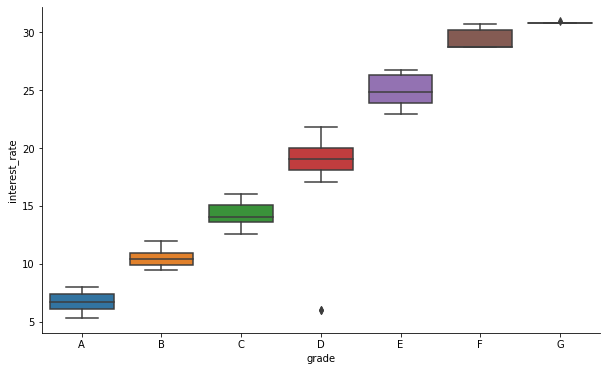

In [12]:
# Plot the box plot of the interest rate for each grade

ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot(x='grade', y='interest_rate', data=df, order = sorted(df['grade'].unique()))
sns.despine()

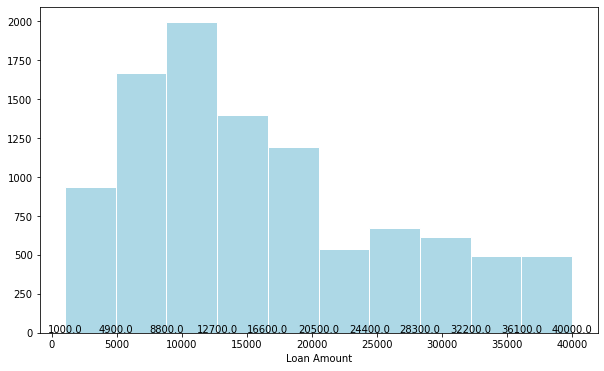

In [16]:
# plot the histogram for the loan amount

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['loan_amount'], align='mid', edgecolor='white', color='lightblue')
for num in bins:
    plt.text(num, 1, round(num, 1), ha='center', color='black')
plt.xlabel('Loan Amount')
plt.show()

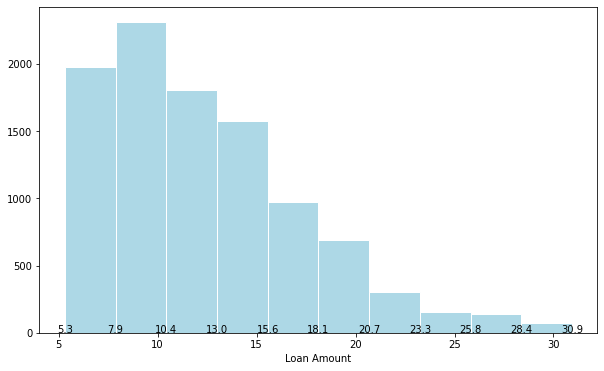

In [15]:
# plot the histogram for the interest rate

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['interest_rate'], align='mid', edgecolor='white', color='lightblue')
for num in bins:
    plt.text(num, 1, round(num, 1), ha='center', color='black')
plt.xlabel('Loan Amount')
plt.show()

In [45]:
# Check the missing value and consider to drop and deal with the missing value
variable_proportion[variable_proportion['missing%'] != 0]

,Variable,missing%
0,emp_title,8.33
1,emp_length,8.17
6,debt_to_income,0.24
7,annual_income_joint,85.05
8,verification_income_joint,85.45
9,debt_to_income_joint,85.05
11,months_since_last_delinq,56.58
20,months_since_90d_late,77.15
25,months_since_last_credit_inquiry,12.71
27,num_accounts_120d_past_due,3.18


In [46]:
drop_col = list(variable_proportion[variable_proportion['missing%'] > 50]['Variable'])

In [47]:
drop_col.append('emp_title')
drop_col.append('emp_length')

In [48]:
df = df.drop(columns = drop_col)

In [49]:
variable_proportion[variable_proportion['missing%'] != 0]

,Variable,missing%
0,emp_title,8.33
1,emp_length,8.17
6,debt_to_income,0.24
7,annual_income_joint,85.05
8,verification_income_joint,85.45
9,debt_to_income_joint,85.05
11,months_since_last_delinq,56.58
20,months_since_90d_late,77.15
25,months_since_last_credit_inquiry,12.71
27,num_accounts_120d_past_due,3.18


In [50]:
df['months_since_last_credit_inquiry'].fillna(int(df['months_since_last_credit_inquiry'].mean()), inplace=True)
df['num_accounts_120d_past_due'].fillna(int(df['num_accounts_120d_past_due'].mean()), inplace=True)
df = df.dropna() # for debt_to_income

In [51]:
df.isnull().sum()

state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc_accounts               0
num_open_cc_accounts                0
num_cc_carry

In [52]:
df_float_col = pd.DataFrame(df.drop(columns = ['interest_rate']).dtypes[df.drop(columns = ['interest_rate']).dtypes == 'float64']).index
df_float = df[df_float_col]
  
vif_data = pd.DataFrame()
vif_data["feature"] = df_float.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_float.values, i)
                          for i in range(len(df_float.columns))]




In [53]:
vif_data

,feature,VIF
0,annual_income,2.920008e+00
1,debt_to_income,2.832539e+00
2,months_since_last_credit_inquiry,2.676034e+00
3,num_accounts_120d_past_due,NaN
4,account_never_delinq_percent,7.729972e+00
5,installment,3.352700e+01
6,balance,2.925839e+01
7,paid_total,6.127346e+13
8,paid_principal,5.236744e+13
9,paid_interest,1.751692e+12


In [54]:
vif_data[vif_data['VIF'] > 5]

,feature,VIF
4,account_never_delinq_percent,7.729972e+00
5,installment,3.352700e+01
6,balance,2.925839e+01
7,paid_total,6.127346e+13
8,paid_principal,5.236744e+13
9,paid_interest,1.751692e+12
10,paid_late_fees,9.244368e+06


<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

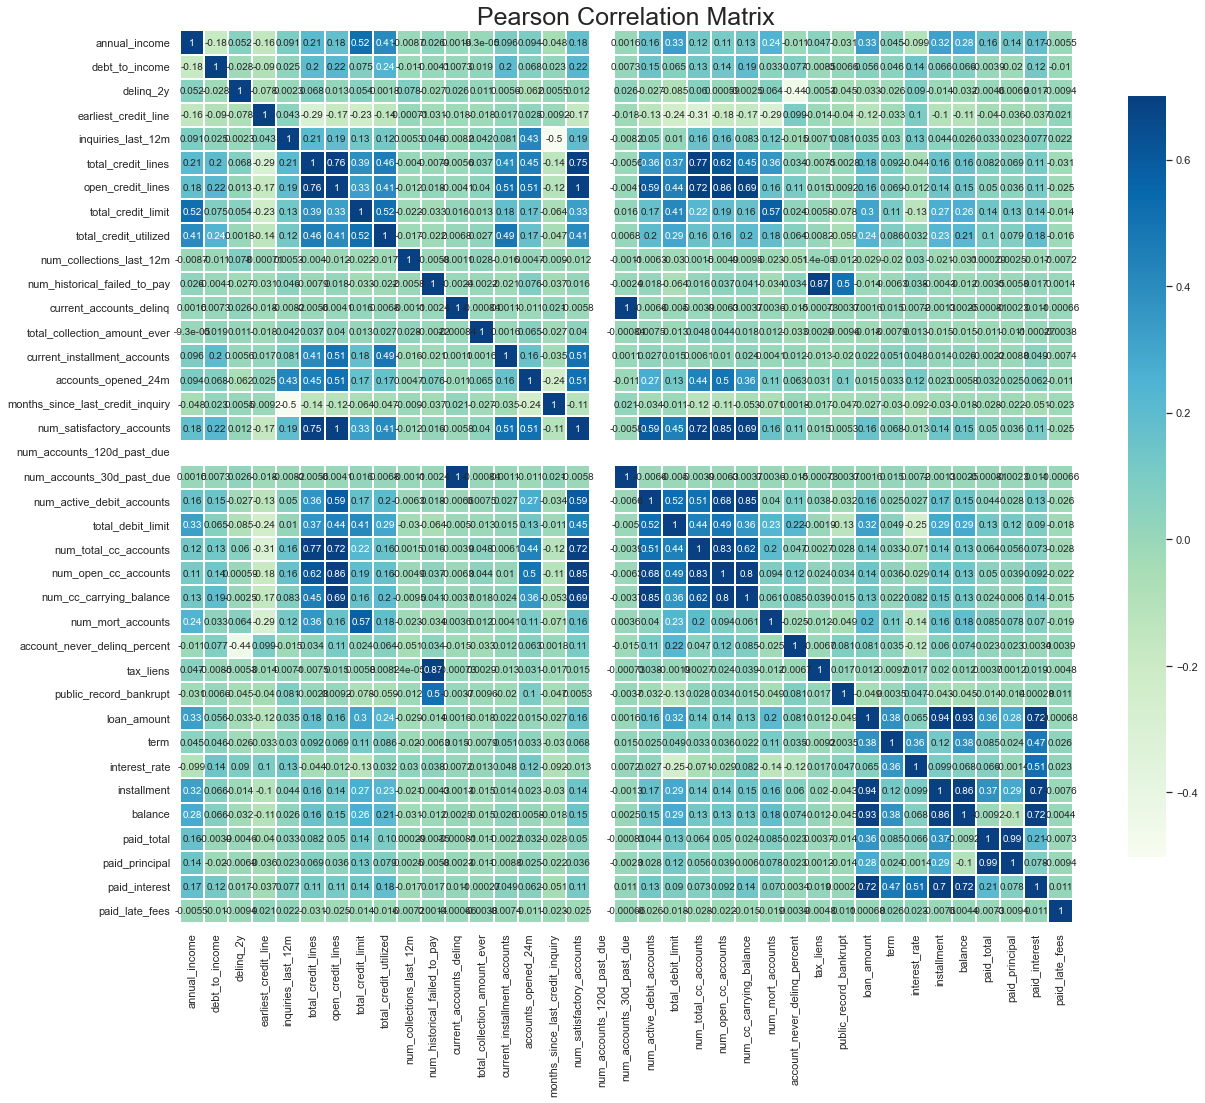

In [55]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(20,20))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

In [56]:
# Start training process
import math
import xgboost
from xgboost import XGBRegressor
from itertools import chain, combinations
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.preprocessing import MinMaxScaler

In [57]:
# Encoding the categorical data columns

obj_columns = [col for col in df.columns if df[col].dtype.name == 'object']
df = pd.get_dummies(df, columns = obj_columns)

In [58]:
X = df.drop('interest_rate', axis=1)
y = df['interest_rate']

In [60]:
print(X.shape)
print(y.shape)

(9976, 158)
(9976,)


In [61]:
# split the data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Train the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [63]:
lm_y_pred = lm.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, lm_y_pred)
RMSE = math.sqrt(mse)
mae = mean_absolute_error(y_test, lm_y_pred)
r2 = r2_score(y_test, lm_y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {RMSE}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.0061089226640720215
RMSE: 0.07815959738939308
MAE: 0.049202825663729834
R^2: 0.9997645405274415


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

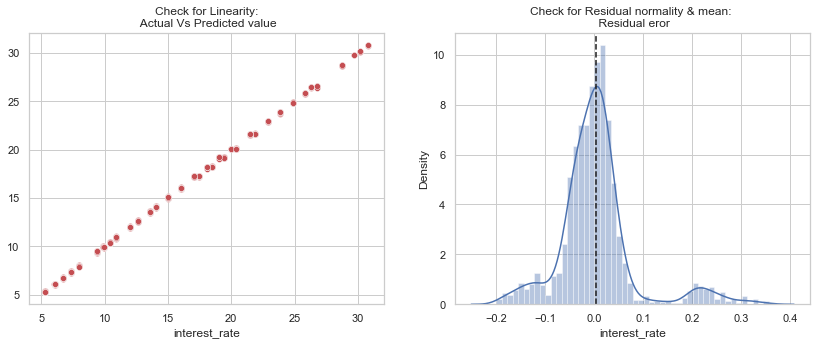

In [67]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,lm_y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - lm_y_pred),ax=ax,color='b')
ax.axvline((y_test - lm_y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

In [68]:
# Train the XGB Regressor model
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
xgb_y_pred = xgb.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, xgb_y_pred)
RMSE = math.sqrt(mse)
mae = mean_absolute_error(y_test, xgb_y_pred)
r2 = r2_score(y_test, xgb_y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {RMSE}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.008362291736898777
RMSE: 0.09144556707079232
MAE: 0.022447331625378465
R^2: 0.9996776877184367
